# Clip & Categorize EDDI

a. stein 7.20.2022

Getting EDDI setup to compare to WA USDM, following the work of `organize_data/clip_cat_spei.ipynb` (literally CTRL+F Replace All)

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

import matplotlib.dates as mdates

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_3792559/1988245056.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Load in USDM and eddi

In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

# USDM will be already clipped, but we'll need to clip spi real quick
usdm = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')
eddi_1y = xr.open_dataset(f'{dm_path}/eddi/eddi1y.nc')

In [3]:
eddi_1y

<xarray.Dataset>
Dimensions:  (lon: 1386, lat: 585, day: 3066, crs: 1)
Coordinates:
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
  * crs      (crs) uint16 3
Data variables:
    eddi     (day, lat, lon) float32 ...
Attributes: (12/24)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    last_permanent_slice:       3006
    last_early_slice:           3066
    last_provisional_slice:     3060
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [4]:
eddi_1y.crs

<xarray.DataArray 'crs' (crs: 1)>
array([3], dtype=uint16)
Coordinates:
  * crs      (crs) uint16 3
Attributes:
    grid_mapping_name:            latitude_longitude
    longitude_of_prime_meridian:  0.0
    semi_major_axis:              6378137.0
    long_name:                    WGS 84
    inverse_flattening:           298.257223563
    GeoTransform:                 -124.7666666333333 0.041666666666666 0  49....
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...

In [5]:
eddi_1y_da = eddi_1y['eddi'].rio.write_crs('EPSG:4326', inplace=True)

Grab some bounds for Washington and check the crs

In [6]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)
wa_gdf = states_gdf[(states_gdf.NAME=='Washington')]

In [7]:
wa_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Clip eddi to WA

In [8]:
eddi_da_wa = wrangle.clip_xarray(eddi_1y_da, wa_gdf)

In [9]:
eddi_da_wa

<xarray.DataArray 'eddi' (day: 3066, lat: 84, lon: 188)>
array([[[      nan,       nan,       nan, ..., 1.0099998,       nan,
               nan],
        [      nan,       nan,       nan, ..., 0.9000001,       nan,
               nan],
        [      nan,       nan,       nan, ..., 1.0099998,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 1.0099998,       nan,
               nan],
        [      nan,       nan,       nan, ..., 0.9000001,       nan,
               nan],
        [      nan,       nan,       nan, ..., 1.0099998,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 0.9000001,       nan,
               nan],
        [      nan,       nan,       nan, ..., 0.9000001,       nan,
               nan],
        [      nan,       nan,       nan, ..., 1.0099998,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
    crs      int64 0
Attributes:
    units:              
    description:        Evaporative Demand Drought Index
    long_name:          eddi1y
    standard_name:      eddi1y
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

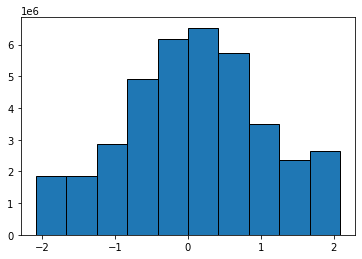

In [10]:
plt.hist(eddi_da_wa.values.ravel(), bins=10, edgecolor='k');

### Convert eddi to USDM Categories

USDM doesn't specifically have a conversion listed for eddi, although I bet it'd be similar to SPI. However, I'm just going to use the percentiles as follows:

D0 : 21 to 30 p    
D1 : 11 to 20 p    
D2 : 6 to 10 p    
D3 : 3 to 5 p    
D4 : 0 to 2 p

And construct the percentile limits based on the whole distribution

In [11]:
eddi_vals = eddi_da_wa.values.ravel()
eddi_vals = eddi_vals[np.isnan(eddi_vals) == False]

In [12]:
for p in [30, 20, 10, 5, 2]:
    print(p, f'{np.percentile(eddi_vals, p):.2f}')

30 -0.39
20 -0.71
10 -1.13
5 -1.45
2 -2.09


Okay, so pretty close, but still a bit different. Worth the difference in my opinion

In [13]:
def dm_to_usdmcat(da:xr.DataArray):
    """Categorizes drought measure based on USDM categories.

    Uses the mapping scheme presented by USDM (https://droughtmonitor.unl.edu/About/AbouttheData/DroughtClassification.aspx)
    Where Neutral is -1, D0 is 0, D1 is 1, D2, is 2, D3 is 3, and D4 is 4.

    Parameters
    ----------
    da : xr.DataArray
        Contains SPI values.
    
    Returns
    -------
    xr.DataArray
        DataArray formatted the same as da but using USDM categories.

    """

    # make sure we don't overwrite the original
    da_copy = da.copy()
    # can only do boolean indexing on the underlying array
    da_vals = da.values
    da_vals_nonnan = da_vals[np.isnan(da_vals) == False]
    # calculate percentiles
    (p30, p20, p10, p5, p2) = np.percentile(da_vals_nonnan.ravel(), [30, 20, 10, 5, 2])
    # get a copy to make sure reassignment isn't compounding
    da_origin = da_vals.copy()

    # assign neutral
    da_vals[da_origin > p30] = -1
    # assign D0
    da_vals[(da_origin <= p30)&(da_origin > p20)] = 0
    # assign D1
    da_vals[(da_origin <= p20)&(da_origin > p10)] = 1
    # assign D2
    da_vals[(da_origin <= p10)&(da_origin > p5)] = 2
    # assign D3
    da_vals[(da_origin <= p5)&(da_origin > p2)] = 3
    # assign D4
    da_vals[(da_origin <= p2)] = 4

    # put them back into the dataarray
    da_copy.loc[:,:] = da_vals

    return da_copy

In [14]:
def dm_to_usdmcat_multtime(ds:xr.Dataset):
    """Categorizes drought measure based on USDM categories for multiple times.
    
    See dm_to_usdmcat for further documentation.
    
    Parameters
    ----------
    spi_ds : xr.Dataset
        SPI at multiple time values as the coordinate 'day'.
    
    Returns
    -------
    xr.Dataset
        Drought measure categorized by dm_to_usdmcat.
    """
    
    return dm_to_usdmcat(xr.concat([ds.sel(day=day) for day in ds['day'].values], dim='day'))

In [15]:
eddi_cat = dm_to_usdmcat_multtime(eddi_da_wa)
eddi_cat

<xarray.DataArray 'eddi' (day: 3066, lat: 84, lon: 188)>
array([[[nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
    crs      int64 0
Attributes:
    units:              
    description:        Evaporative Demand Drought Index
    long_name:          eddi1y
    standard_name:      eddi1y
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

Fab, that works

Let's clip all the eddi and also save out the WA USDM categorized eddi. Then we'll make the paired dataset

In [16]:
eddi_intervals = ['1y', '2y', '5y', '14d', '30d', '90d', '180d', '270d']

for interval in tqdm(eddi_intervals):
    eddi_ds = xr.open_dataset(f'{dm_path}/eddi/eddi{interval}.nc')
    eddi_da = eddi_ds['eddi'].rio.write_crs('EPSG:4326', inplace=True)
    eddi_da_wa = wrangle.clip_xarray(eddi_da, wa_gdf)
    attrs = eddi_da_wa.attrs
    attrs['Clipping'] = 'original data was clipped to Washington using http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
    del attrs['grid_mapping']
    eddi_da_wa.attrs = attrs

    try:
        os.remove(f'{dm_path}/eddi/WA/eddi_{interval}.nc')
    except:
        pass

    eddi_da_wa.to_netcdf(f'{dm_path}/eddi/WA/eddi_{interval}.nc')

    # do some gc
    eddi_ds = None
    eddi_da = None
    eddi_da_wa = None
    

  0%|          | 0/8 [00:00<?, ?it/s]

Fab. Now to do the pairing.

I should just be able to use my `compare.pair_to_usdm_date` function

Also looks like the eddi resolution is the same as SPI resolution, so I'll follow suit in upscaling USDM to SPI ... while it might be helpful to have everything in terms of USDM, including resolution, I rather not make up data by pretending something is higher resolution than it actually is, so will continue to go for whichever has larger resolution.

In [17]:
usdm = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')

In [18]:
eddi_da_list = [xr.open_dataset(f'{dm_path}/eddi/WA/eddi_{interval}.nc')[f'eddi'] for interval in eddi_intervals]

In [19]:
# double check for any coordinate mismatches
for eddi in eddi_da_list[1:]:
    if len(np.where(eddi_da_list[0]['day'].values != eddi['day'].values)[0]) != 0:
        print('Time mistmatch')
    if len(np.where(eddi_da_list[0]['lat'].values != eddi['lat'].values)[0]) != 0:
        print('lat mismatch')
    if len(np.where(eddi_da_list[0]['lon'].values != eddi['lon'].values)[0]) != 0:
        print('lon mismatch')

Good

In [20]:
usdm_dates = pd.DatetimeIndex(usdm['date'].values)
eddi_dates = pd.DatetimeIndex(eddi_da_list[0]['day'].values)

pair_dates = compare.pair_to_usdm_date(usdm_dates, eddi_dates, 'EDDI Date', realign=True)
pair_dates

/pool0/data/steinjao/drought/drought_impact/notebooks/organize_data/../../ndrought/compare.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_dates['USDM Date'].iloc[i-1] = date
/pool0/data/steinjao/drought/drought_impact/notebooks/organize_data/../../ndrought/compare.py:128: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  pair_dates = pair_dates.dropna('index')


,EDDI Date,USDM Date
0,1999-12-31,2000-01-04 00:00:00
1,2000-01-10,2000-01-11 00:00:00
2,2000-01-15,2000-01-18 00:00:00
3,2000-01-25,2000-01-25 00:00:00
4,2000-01-30,2000-02-01 00:00:00
...,...,...
1144,2021-12-06,2021-12-07 00:00:00
1145,2021-12-11,2021-12-14 00:00:00
1146,2021-12-21,2021-12-21 00:00:00
1147,2021-12-26,2021-12-28 00:00:00


In [21]:
eddi_usdmcat = dict()

for eddi, interval in tqdm(zip(eddi_da_list, eddi_intervals), total=len(eddi_intervals)):
    eddi_usdmcat[interval] = compare.dm_to_usdmcat_multtime(eddi.sel(day=pair_dates['EDDI Date'].values), percentiles=[-0.5, -0.8, -1.3, -1.6, -2.0])

  0%|          | 0/8 [00:00<?, ?it/s]

In [22]:
eddi_usdmcat_ds = eddi_usdmcat[eddi_intervals[0]].copy().to_dataset(name=f'eddi_{eddi_intervals[0]}')
del eddi_usdmcat_ds[f'eddi_{eddi_intervals[0]}'].attrs['grid_mapping']
eddi_usdmcat_ds

<xarray.Dataset>
Dimensions:  (lat: 84, lon: 188, day: 1149)
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1999-12-31 2000-01-10 ... 2021-12-31
Data variables:
    eddi_1y  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [23]:
for interval in eddi_intervals[1:]:
    eddi_usdmcat_ds[f'eddi_{interval}'] = eddi_usdmcat[interval]
    del eddi_usdmcat_ds[f'eddi_{interval}'].attrs['grid_mapping']

In [24]:
eddi_usdmcat_ds.attrs = {
    'author' : 'a. stein, 9/9/2022',
    'description' : 'Evaporative Demand Drought Index (EDDI) gathered from various time windows, (specified by the value following the underscore), categorized into USDM categories ndrought.compare.dm_to_usdmcat function.',
    'clipping' : 'Clipped to Washington state using http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
}
eddi_usdmcat_ds

<xarray.Dataset>
Dimensions:    (lat: 84, lon: 188, day: 1149)
Coordinates:
  * lat        (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon        (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * day        (day) datetime64[ns] 1999-12-31 2000-01-10 ... 2021-12-31
Data variables:
    eddi_1y    (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    eddi_2y    (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    eddi_5y    (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    eddi_14d   (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    eddi_30d   (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    eddi_90d   (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    eddi_180d  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    eddi_270d  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    author:       a. stein, 9/9/2022
    description:  Evaporative Demand Drought Index (EDDI) gathered from vario...
    clipping:     Clipped to Washington state using http://eric.clst.org/asse...

In [25]:
try:
    os.remove(f'{dm_path}/eddi/WA/eddi_usdmcat_WA.nc')
except:
    pass
eddi_usdmcat_ds.to_netcdf(f'{dm_path}/eddi/WA/eddi_usdmcat_WA.nc')

Now for hte paired dataset

In [26]:
usdm_da = usdm['USDM'].rio.write_crs('EPSG:4326', inplace=True)
usdm_upscale = usdm_da.rio.reproject_match(eddi_da_list[0].rio.write_crs('EPSG:4326', inplace=True))

In [27]:
timeless_ds = usdm_upscale.sel(date=pair_dates['USDM Date'].values).to_dataset()
timeless_ds['date'] = pair_dates.index.values
timeless_ds = timeless_ds.rename_dims({'date':'index', 'x':'lon', 'y':'lat'})
timeless_ds = timeless_ds.rename_vars({'date':'index', 'x':'lon', 'y':'lat'})
timeless_ds['USDM Date'] = xr.DataArray(
    pair_dates['USDM Date'].values, 
    dims=['index'], 
    coords=dict(index=pair_dates.index.values)
)
timeless_ds

<xarray.Dataset>
Dimensions:      (index: 1149, lon: 188, lat: 84)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 ... 1143 1144 1145 1146 1147 1148
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * lat          (lat) float64 48.98 48.94 48.9 48.86 ... 45.61 45.57 45.53
    spatial_ref  int64 0
Data variables:
    USDM         (index, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    USDM Date    (index) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-01-04

In [28]:
for interval in eddi_intervals:
    eddi = eddi_usdmcat_ds[f'eddi_{interval}']
    timeless_ds[f'eddi_{interval}'] = xr.DataArray(
        eddi.values,
        dims=['index', 'lat', 'lon'],
        coords=dict(
            index=timeless_ds['index'].values,
            lat = eddi['lat'].values,
            lon = eddi['lon'].values,
        )
    )

In [29]:
timeless_ds

<xarray.Dataset>
Dimensions:      (lat: 84, lon: 188, index: 1149)
Coordinates:
  * lat          (lat) float64 48.98 48.94 48.9 48.86 ... 45.61 45.57 45.53
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * index        (index) int64 0 1 2 3 4 5 6 ... 1143 1144 1145 1146 1147 1148
    spatial_ref  int64 0
Data variables:
    USDM         (index, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    USDM Date    (index) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-01-04
    eddi_1y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_2y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_5y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_14d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_30d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_90d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_180d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_270d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [30]:
timeless_ds['EDDI Date'] = xr.DataArray(
    pair_dates['EDDI Date'].values, 
    dims=['index'], 
    coords=dict(index=pair_dates.index.values)
)
timeless_ds

<xarray.Dataset>
Dimensions:      (lat: 84, lon: 188, index: 1149)
Coordinates:
  * lat          (lat) float64 48.98 48.94 48.9 48.86 ... 45.61 45.57 45.53
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * index        (index) int64 0 1 2 3 4 5 6 ... 1143 1144 1145 1146 1147 1148
    spatial_ref  int64 0
Data variables:
    USDM         (index, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    USDM Date    (index) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-01-04
    eddi_1y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_2y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_5y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_14d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_30d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_90d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_180d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    eddi_270d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    EDDI Date    (index) datetime64[ns] 1999-12-31 2000-01-10 ... 2021-12-31

In [31]:
timeless_ds.attrs = {
    'author': 'a. stein 9/9/2022',
    'description': 'USDM and EDDI matched to USDM data cutoff dates, as described by the index for Washington State. USDM has been upscaled to EDDI resolution while EDDI has been categorized according to the USDM drought categories.',
    'USDM Date': 'this contains the original dates for USDM',
    'eddi Date': 'this contains the original dates for eddi'
}

In [32]:
try:
    os.remove(f'{dm_path}/ndrought_products/paired_USDM_eddi.nc')
except:
    pass
timeless_ds.to_netcdf(f'{dm_path}/ndrought_products/paired_USDM_eddi.nc')

Delightful.